# Assignment - Cross Validation & Hyperparameter Tuning

In this assignment, you are going to measure the performance of the model you created with the Titanic dataset in the previous lesson. To complete this assignment, send a link to a Jupyter notebook containing solutions to the following tasks.

* Evaluate your model's performance with cross validation and using different metrics.
* Determine the model with the most appropriate parameters by hyperparameter tuning.

In [1]:
import pandas as pd
import numpy as np
train_data = pd.read_csv('titanic_train.csv')

In [2]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train_data['is_male'] = pd.get_dummies(train_data['Sex'],drop_first = True)
train_data.drop(labels='Sex', axis=1, inplace=True)   

In [5]:
print(pd.unique(train_data[['Embarked']].values.ravel('K')))

['S' 'C' 'Q' nan]


In [6]:
# C = Cherbourg
# S = Southampton
# Q = Queenstown
train_data.Embarked = train_data.Embarked.replace('C', 1)
train_data.Embarked = train_data.Embarked.replace('Q', 2)
train_data.Embarked = train_data.Embarked.replace('S', 3)
train_data.Embarked = train_data.Embarked.replace(np.nan, 0)

In [7]:
train_data.dropna(subset=['Age'], how='all', inplace=True)

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Name         714 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        714 non-null    int64  
 6   Parch        714 non-null    int64  
 7   Ticket       714 non-null    object 
 8   Fare         714 non-null    float64
 9   Cabin        185 non-null    object 
 10  Embarked     714 non-null    float64
 11  is_male      714 non-null    uint8  
dtypes: float64(3), int64(5), object(3), uint8(1)
memory usage: 67.6+ KB


In [9]:
#Second model has been given the best result on the C_03_PerformanceMeasurementMetrics homework notebook.
X = train_data[['Pclass','is_male','Age','Fare','Embarked']]
y = train_data['Survived']

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
print("Number of data points in training set:  {}  ".format(len(X_train)))
print("Number of targets in training set    :  {}\n".format(len(y_train)))

print("Number of data points in test set    :  {}  ".format(len(X_test)))
print("Number of targets in test set        :  {}  ".format(len(y_test)))

Number of data points in training set:  571  
Number of targets in training set    :  571

Number of data points in test set    :  143  
Number of targets in test set        :  143  


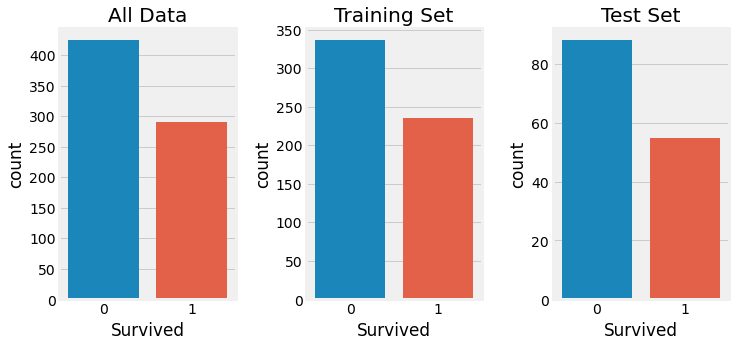

Proportion of '0' in all data     : %59 
Proportion of '0' in training set : %59 
Proportion of '0' in test set     : %62 


In [12]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.style.use('fivethirtyeight')
plt.subplots_adjust(wspace=0.4)

plt.subplot(131)
sns.countplot(y)
plt.title("All Data")

plt.subplot(132)
sns.countplot(y_train)
plt.title("Training Set")

plt.subplot(133)
sns.countplot(y_test)
plt.title("Test Set")

plt.show()

print("Proportion of '0' in all data     : %{:.0f} ".format(len(y[y==0])/len(y)*100))
print("Proportion of '0' in training set : %{:.0f} ".format(len(y_train[y_train==0])/len(y_train)*100))
print("Proportion of '0' in test set     : %{:.0f} ".format(len(y_test[y_test==0])/len(y_test)*100))

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

print("Proportion of '0' in all data     : %{:.0f} ".format(len(y[y==0])/len(y)*100))
print("Proportion of '0' in training set : %{:.0f} ".format(len(y_train[y_train==0])/len(y_train)*100))
print("Proportion of '0' in test set     : %{:.0f} ".format(len(y_test[y_test==0])/len(y_test)*100))

Proportion of '0' in all data     : %59 
Proportion of '0' in training set : %59 
Proportion of '0' in test set     : %59 


In [14]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

pred_train = model.predict(X_train)
pred_test = model.predict(X_test)
model.score(X_test, y_test)

0.7832167832167832

## 1.2.1. KFold Cross Validation

In [15]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=1111)

In [16]:
pieces = kf.split(X)

for num, (train_index, test_index) in enumerate(pieces):
    print("No.{} Train set size : {}".format(num+1,len(train_index)))
    print("No.{} Test set size     : {}".format(num+1,len(test_index)))
    print('-'*28, "\n")

No.1 Train set size : 571
No.1 Test set size     : 143
---------------------------- 

No.2 Train set size : 571
No.2 Test set size     : 143
---------------------------- 

No.3 Train set size : 571
No.3 Test set size     : 143
---------------------------- 

No.4 Train set size : 571
No.4 Test set size     : 143
---------------------------- 

No.5 Train set size : 572
No.5 Test set size     : 142
---------------------------- 



In [17]:
from sklearn.metrics import mean_squared_error

model2 = LogisticRegression()

pieces = kf.split(X)
score_list = []

for i, (train_index, test_index) in enumerate(pieces):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model2.fit(X_train, y_train)
    
    prediction = model2.predict(X_test)
    
    score = model.score(X_test, y_test)  
    score_list.append(score)
    
    print("Piece No.{} score: {:.3f}".format(i+1, score))
    print("-"*23, "\n")

Piece No.1 score: 0.776
----------------------- 

Piece No.2 score: 0.769
----------------------- 

Piece No.3 score: 0.832
----------------------- 

Piece No.4 score: 0.797
----------------------- 

Piece No.5 score: 0.796
----------------------- 



In [18]:
print("Mean score : {:.2f}".format(np.mean(score_list)))

Mean score : 0.79


## 1.2.2. Cross Validation with cross_val_score() and cross_validate()

In [19]:
from sklearn.model_selection import cross_validate, cross_val_score

In [20]:
log_reg_model = LogisticRegression()

cv = cross_validate(estimator=log_reg_model,
                    X=X,
                    y=y,
                    cv=10,
                    return_train_score=True,
                   )

print('Train Scores :', cv['train_score'], sep = '\n')
print("-"*50)
print('Test Scores     :', cv['test_score'], sep = '\n')

Train Scores :
[0.80218069 0.80373832 0.79750779 0.78660436 0.79782271 0.79315708
 0.79782271 0.79315708 0.79004666 0.79004666]
--------------------------------------------------
Test Scores     :
[0.76388889 0.75       0.80555556 0.84722222 0.73239437 0.8028169
 0.77464789 0.76056338 0.81690141 0.83098592]


In [21]:
print('Mean score of train set : ', cv['train_score'].mean())
print('Mean score of test set  : ', cv['test_score'].mean())

Mean score of train set :  0.7952084029786389
Mean score of test set  :  0.7884976525821596


In [22]:
cv = cross_validate(estimator=log_reg_model,
                    X=X,
                    y=y,
                    cv=10,
                    return_train_score=True,
                    scoring = ['accuracy', 'precision', 'r2']
                   )

In [23]:
print('Train Set Mean Accuracy  : {:.2f}  '.format(cv['train_accuracy'].mean()))
print('Train Set Mean R-square  : {:.2f}  '.format(cv['train_r2'].mean()))
print('Train Set Mean Precision : {:.2f}\n'.format(cv['train_precision'].mean()))

print('Test Set Mean Accuracy   : {:.2f}  '.format(cv['test_accuracy'].mean()))
print('Test Set Mean R-square   : {:.2f}  '.format(cv['test_r2'].mean()))
print('Test Set Mean Precision  : {:.2f}  '.format(cv['test_precision'].mean()))

Train Set Mean Accuracy  : 0.80  
Train Set Mean R-square  : 0.15  
Train Set Mean Precision : 0.76

Test Set Mean Accuracy   : 0.79  
Test Set Mean R-square   : 0.12  
Test Set Mean Precision  : 0.76  


In [24]:
cv = cross_val_score(estimator=log_reg_model,
                     X=X,
                     y=y,
                     cv=10,
                    )

print('Model Scores : ', cv, sep = '\n')

Model Scores : 
[0.76388889 0.75       0.80555556 0.84722222 0.73239437 0.8028169
 0.77464789 0.76056338 0.81690141 0.83098592]


In [25]:
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(estimator=log_reg_model,
                           X=X,
                           y=y,
                           cv=10,
                          )
print(y_pred[0:10])

[0 1 1 1 0 0 0 1 1 1]


# 2. Hyperparameter Tuning

In [26]:
log_reg = LogisticRegression()

print(log_reg.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


## 2.1. Grid Search

In [27]:
parameters = {"C": [10 ** x for x in range (-5, 5, 1)],
              "penalty": ['l1', 'l2']
             }

In [28]:
from sklearn.model_selection import GridSearchCV

grid_cv = GridSearchCV(estimator=log_reg,
                       param_grid = parameters,
                       cv = 10
                      )

grid_cv.fit(X, y)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                               1000, 10000],
                         'penalty': ['l1', 'l2']})

In [29]:
print("Best Parameters : ", grid_cv.best_params_)
print("Best Score      : ", grid_cv.best_score_)

Best Parameters :  {'C': 0.1, 'penalty': 'l2'}
Best Score      :  0.7942097026604069


In [30]:
import pandas as pd

results = grid_cv.cv_results_

df = pd.DataFrame(results)
display(df.head().iloc[:,:6])
df.info()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty
0,0.000892,0.000294,0.000000,0.000000,1e-05,l1
1,0.010369,0.001961,0.002123,0.000272,1e-05,l2
2,0.000995,0.000230,0.000000,0.000000,0.0001,l1
3,0.009460,0.001263,0.001902,0.000224,0.0001,l2
4,0.000932,0.000210,0.000000,0.000000,0.001,l1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   mean_fit_time      20 non-null     float64
 1   std_fit_time       20 non-null     float64
 2   mean_score_time    20 non-null     float64
 3   std_score_time     20 non-null     float64
 4   param_C            20 non-null     object 
 5   param_penalty      20 non-null     object 
 6   params             20 non-null     object 
 7   split0_test_score  10 non-null     float64
 8   split1_test_score  10 non-null     float64
 9   split2_test_score  10 non-null     float64
 10  split3_test_score  10 non-null     float64
 11  split4_test_score  10 non-null     float64
 12  split5_test_score  10 non-null     float64
 13  split6_test_score  10 non-null     float64
 14  split7_test_score  10 non-null     float64
 15  split8_test_score  10 non-null     float64
 16  split9_test_score  10 non-nu

In [31]:
df = df[['param_penalty','param_C', 'mean_test_score']]
df = df.sort_values(by='mean_test_score', ascending = False)
df

,param_penalty,param_C,mean_test_score
9,l2,0.1,0.794210
11,l2,1,0.788498
15,l2,100,0.788498
17,l2,1000,0.788498
19,l2,10000,0.788498
13,l2,10,0.787089
7,l2,0.01,0.721440
5,l2,0.001,0.662461
3,l2,0.0001,0.654030
1,l2,1e-05,0.645638


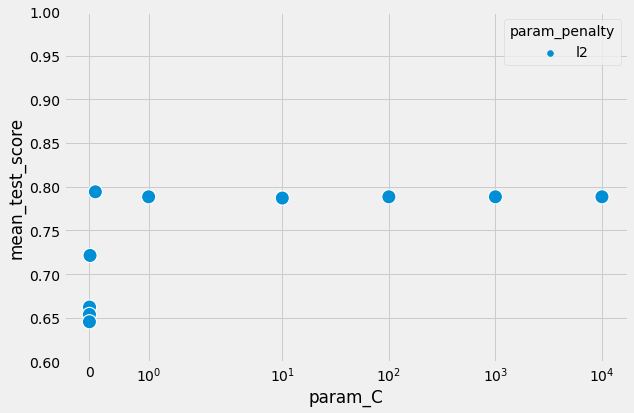

In [32]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(9,6))

sns.scatterplot(x = 'param_C', y = 'mean_test_score', hue = 'param_penalty', data = df[0:10], s=200)
plt.xscale('symlog')
plt.ylim((0.6,1))

plt.show()

## 2.2. Random Search

In [33]:
parameters = {"C": [10 ** x for x in range (-5, 5, 1)],
              "penalty": ['l1', 'l2']
             }

In [34]:
from sklearn.model_selection import RandomizedSearchCV

rs_cv = RandomizedSearchCV(estimator=log_reg,
                           param_distributions = parameters,
                           cv = 10,
                           n_iter = 10,
                           random_state = 111,
                           scoring = 'precision'
                      )

rs_cv.fit(X, y)

RandomizedSearchCV(cv=10, estimator=LogisticRegression(),
                   param_distributions={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1,
                                              1, 10, 100, 1000, 10000],
                                        'penalty': ['l1', 'l2']},
                   random_state=111, scoring='precision')

In [35]:
print("Best parameters      : ", rs_cv.best_params_, "\n")
print("All precision values : ", rs_cv.cv_results_['mean_test_score'], "\n")
print("Best precision value : ", rs_cv.best_score_)

Best parameters      :  {'penalty': 'l2', 'C': 1} 

All precision values :  [0.68913392 0.68728022 0.76035893 0.76431303        nan 0.76116352
        nan        nan        nan        nan] 

Best precision value :  0.7643130270182369


In [36]:
results_rs = rs_cv.cv_results_

df_rs = pd.DataFrame(results_rs)
df_rs = df_rs[['param_penalty','param_C', 'mean_test_score']]
df_rs = df_rs.sort_values(by='mean_test_score', ascending = False)

df_rs

,param_penalty,param_C,mean_test_score
3,l2,1,0.764313
5,l2,1000,0.761164
2,l2,10,0.760359
0,l2,0.0001,0.689134
1,l2,0.001,0.687280
4,l1,100,NaN
6,l1,0.01,NaN
7,l1,0.001,NaN
8,l1,1000,NaN
9,l1,1e-05,NaN


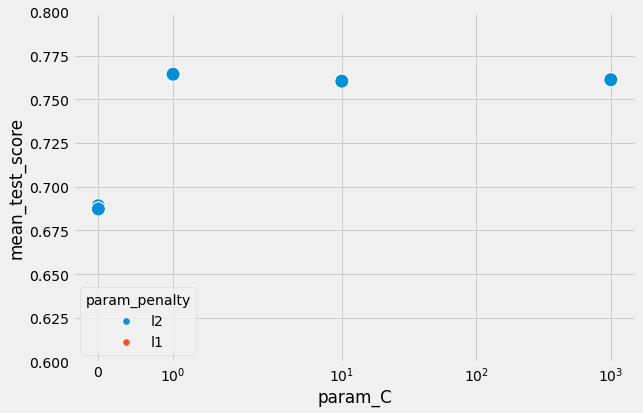

In [38]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(9,6))

sns.scatterplot(x = 'param_C', y = 'mean_test_score', hue = 'param_penalty', data = df_rs, s=200)
plt.xscale('symlog')
plt.ylim((0.6,0.8))

plt.show()